# Clasificación multiclase

### Importaciones

In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Lectura de la información ([URL origen](http://archive.ics.uci.edu/ml/datasets/Iris))

#### Montar Google Drive

In [4]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Lectura de los datos

In [5]:
# dataset: http://archive.ics.uci.edu/ml/datasets/Iris
dataframe = pandas.read_csv(DIRECTORIO + "iris.csv", header=None)

### Preparación de los datos

*Aleatoriza y convierte a array de numpy*

In [6]:
dataframe = dataframe.sample(frac = 1, random_state = 99) # orden aleatorio (100% de las filas)
dataset = dataframe.values  # numpy.ndarray
print(dataset.shape)

(150, 5)


*Divide el dataset entre las variables de entrada (X) y salida (Y), y convierte entradas a float*

In [7]:
X = dataset[:,0:4].astype(float)
y = dataset[:,4]

*Codificación categórica de la salida*

<img src="https://miro.medium.com/max/386/1*Yp6r7m82IoSnnZDPpDpYNw.png" width="300"/>



In [8]:
# codifica los valores de las clases como enteros:
labenc = LabelEncoder()
labenc.fit(y)
y_codif = labenc.transform(y)

print (labenc.classes_)
print (labenc.inverse_transform([0,1,2]))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


*Codificación 'one-hot' de la salida*

<img src="https://i.imgur.com/mtimFxh.png" width="500"/>

El método `to_categorical` de Numpy/Keras:
- Solo acepta enteros (get_dummies de Pandas acepta str)
- Devuelve una arrray empezando siempre por el cero: si los valores existentes empiezan en k, se crean columnas de 0 a k-1.



In [9]:
# codificación “one hot”:
y_1hot = to_categorical(y_codif)

print(y_1hot[0:5,:])
print("\n",y_codif[0:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

 [2 0 1 2 0]


### Crea y compila el modelo

In [10]:
modelo = Sequential()
modelo.add(Input(shape=(4,)))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(3, activation='softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrena

In [11]:
historial=modelo.fit(X, y_1hot, validation_split=0.2, epochs=300, batch_size=16,verbose=0)

### Muestra evolución de las pérdidas y la precisión

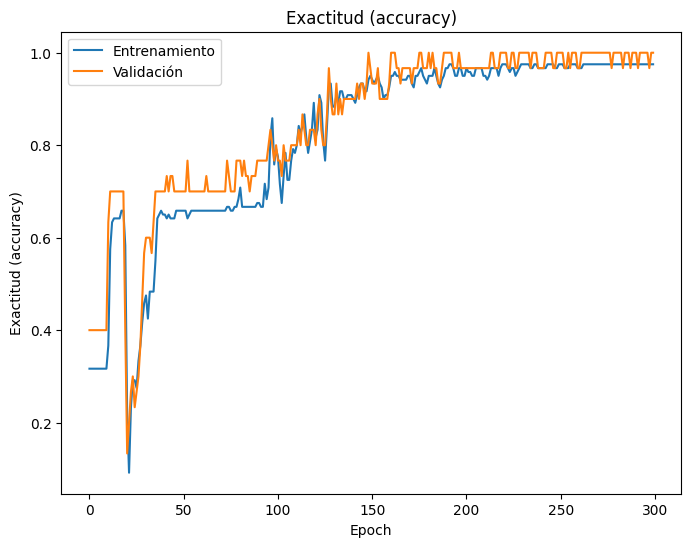

In [12]:
plt.figure(figsize=(8,6))
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.title('Exactitud (accuracy)')
plt.ylabel('Exactitud (accuracy)')
plt.xlabel('Epoch');